

# Project : Movie Lens Dataset Analysis


**Background of Problem Statement :**
<br>The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.
<br>**Problem Objective :**
<br>Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.
<br>**Domain:** 
Entertainment
<br>**Analysis Tasks to be performed:**
<br>1. Import the three datasets
<br>2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. 
<br>(i) Merge two tables at a time. 
<br>(ii) Merge the tables using two primary keys MovieID & UserId
<br>3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
<br>(i) User Age Distribution
<br>(ii) User rating of the movie “Toy Story”
<br>(iii) Top 25 movies by viewership rating
<br>(iv) Find the ratings for all the movies reviewed by for a particular user of user id = 2696
<br>**Feature Engineering:**
<br>Use column genres:
<br>1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
<br>2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
<br>3. Determine the features affecting the ratings of any particular movie.
<br>4. Develop an appropriate model to predict the movie ratings

**Dataset Description :**
<br>These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the data
movies = pd.read_csv('data/movies.dat', sep="::" , header=None, names=["MovieID","Title","Genres"],engine='python')
ratings = pd.read_csv("data/ratings.dat" , sep='::' , header=None, names =['UserID','MovieID','Rating','Timestamp'] , engine='python')
users = pd.read_csv("data/users.dat", sep='::' , header=None, names =['UserID','Gender','Age','Occupation','Zip-code'] , engine='python')

In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [5]:
movies.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [6]:
movies['Title'].describe()

count                       3883
unique                      3883
top       Under Suspicion (2000)
freq                           1
Name: Title, dtype: object

In [7]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings.info()

In [ ]:
ratings.groupby(['UserID','MovieID']).count()

In [8]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users.info()

In [ ]:
len(set(users['UserID']))

In [ ]:
6040*3883

In [9]:
#Merging
tempDataset = pd.merge(ratings,movies,on='MovieID')
tempDataset.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [10]:
finalDF = pd.merge(tempDataset, users, on='UserID')
finalDF.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


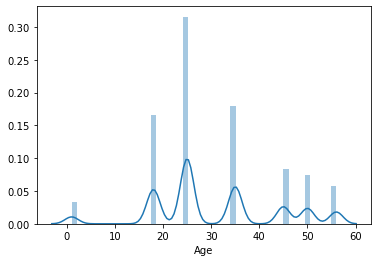

In [11]:
#User Age Distribution
sns.distplot(users.Age)

In [12]:
#User rating of the movie “Toy Story”
finalDF[finalDF.Title.str.contains("Toy Story")]['Title'].unique()

array(['Toy Story (1995)', 'Toy Story 2 (1999)'], dtype=object)

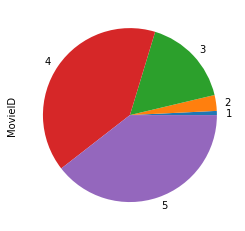

In [13]:
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['MovieID'].count().plot(kind="pie")

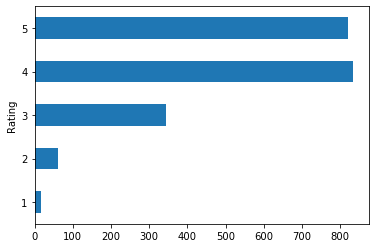

In [14]:
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['MovieID'].count().plot(kind="barh")

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

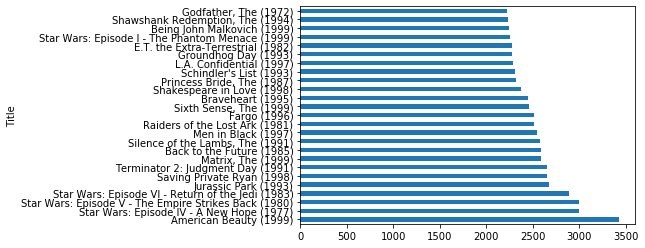

In [15]:
#Top 25 movies by viewership rating
print(finalDF.groupby('Title').Rating.count().nlargest(25))
finalDF.groupby('Title').Rating.count().nlargest(25).plot(kind='barh')

In [ ]:
#finalDF.groupby('Title').Rating.count().nsmallest(5)

Rating
1     2
2     3
3     3
4    11
5     1
Name: MovieID, dtype: int64


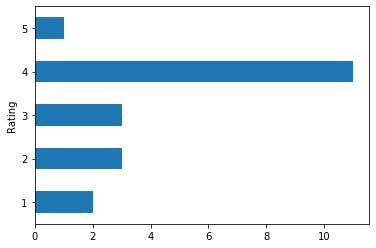

In [16]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
print(finalDF[finalDF.UserID == 2696].groupby('Rating')['MovieID'].count())
finalDF[finalDF.UserID == 2696].groupby('Rating')['MovieID'].count().plot(kind='barh')

In [20]:
finalDF.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [21]:
finalDF.Genres.str.split('|').tolist()[:5]

[['Drama'],
 ['Animation', "Children's", 'Musical'],
 ['Musical', 'Romance'],
 ['Drama'],
 ['Animation', "Children's", 'Comedy']]

In [22]:
#Find out all the unique genres
list1 = finalDF.Genres.str.split('|').tolist()
finalList = []
for i in list1:
    for j in i:
        finalList.append(j)

        
list(set(finalList))

['Musical',
 'Romance',
 'Sci-Fi',
 'Documentary',
 'Thriller',
 'Horror',
 'Fantasy',
 'Crime',
 'Drama',
 'Adventure',
 "Children's",
 'Animation',
 'Mystery',
 'Film-Noir',
 'War',
 'Comedy',
 'Western',
 'Action']

In [ ]:
finalDF.info()

In [23]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) 
finalOHEDF = pd.concat([finalDF.Genres.str.get_dummies('|') , finalDF.iloc[:,[0,1,3,4,5,6,7,8,9]]] , axis=1)

In [24]:
finalOHEDF.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Western,UserID,MovieID,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,0,0,0,0,0,0,0,1,0,0,...,0,1,1193,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,0,0,1,1,0,0,0,0,0,0,...,0,1,661,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,0,0,0,0,0,0,0,0,0,0,...,0,1,914,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,0,0,0,0,0,0,0,1,0,0,...,0,1,3408,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,0,0,1,1,1,0,0,0,0,0,...,0,1,2355,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [25]:
#Determine the features affecting the ratings of any particular movie.
#
# Hint: Perform Chi-sqaure test between Xfeature v/s ratings ---- To do feature elimination
#
# and finalize your feature
#
# final numpy array called 'feature'

from scipy.stats import chi2_contingency

ctTitle = pd.crosstab(finalDF.Title,finalDF.Rating)
ctGender = pd.crosstab(finalDF.Gender,finalDF.Rating)
ctAge = pd.crosstab(finalDF.Age,finalDF.Rating)
ctOccupation = pd.crosstab(finalDF.Occupation,finalDF.Rating)
ctZipCode = pd.crosstab(finalDF['Zip-code'],finalDF.Rating)



In [ ]:
ctTitle.index.name

In [26]:
from scipy.stats import chi2_contingency

list1 = [ctTitle,ctGender,ctAge,ctOccupation,ctZipCode]

for i in list1:
    stat,pvalue,dof,expected_R = chi2_contingency(i)
    if pvalue <= 0.05:
        print("Alternate Hypothesis passed. {} and Rating have Relationship".format(i.index.name))
    else:
        print("Null hypothesis passed. {} and Profit doesnot have  Relationship".format(i.index.name))

Alternate Hypothesis passed. Title and Rating have Relationship
Alternate Hypothesis passed. Gender and Rating have Relationship
Alternate Hypothesis passed. Age and Rating have Relationship
Alternate Hypothesis passed. Occupation and Rating have Relationship
Alternate Hypothesis passed. Zip-code and Rating have Relationship


In [39]:
finalDF.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [37]:
#
# Develop an appropriate model to predict the movie ratings
# using above found feature numpy array and rating as label

features = finalDF.iloc[:,[1,6,7,8]]
label = finalDF.Rating

In [38]:
features.head()

,MovieID,Gender,Age,Occupation
0,1193,F,1,10
1,661,F,1,10
2,914,F,1,10
3,3408,F,1,10
4,2355,F,1,10


In [42]:
from sklearn.preprocessing import LabelEncoder

stateLabelEncoder = LabelEncoder()
features.iloc[:,0] = stateLabelEncoder.fit_transform(features.iloc[:,0])
features.iloc[:,1] = stateLabelEncoder.fit_transform(features.iloc[:,1])

C:\Users\raggar10\Documents\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
titleLe = LabelEncoder()
genderLe = LabelEncoder()
features[:,0] = titleLe.fit_transform(features[:,0])
features[:,1] = genderLe.fit_transform(features[:,1])
features
ohe = OneHotEncoder(categorical_features=[0,1])
features = ohe.fit_transform(features).toarray()

In [43]:
features.head()

,MovieID,Gender,Age,Occupation
0,1104,0,1,10
1,639,0,1,10
2,853,0,1,10
3,3177,0,1,10
4,2162,0,1,10


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state = 1)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
model.score(X_train,y_train)